# Movie Review Sentiment Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"E:\Artificial Intelligence\dataset\sentiment_analysis.csv")
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [3]:
df.shape

(499, 7)

In [4]:
df.columns

Index(['Year', 'Month', 'Day', 'Time of Tweet', 'text', 'sentiment',
       'Platform'],
      dtype='object')

In [5]:
df.drop(['Year', 'Month', 'Day', 'Time of Tweet','Platform'], axis=1, inplace=True)

In [6]:
df.head(2)

,text,sentiment
0,What a great day!!! Looks like dream.,positive
1,"I feel sorry, I miss you here in the sea beach",positive


In [7]:
df["sentiment"].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [8]:
df.columns = ["Reviews", "Sentiment"]

In [9]:
df.head(2)

,Reviews,Sentiment
0,What a great day!!! Looks like dream.,positive
1,"I feel sorry, I miss you here in the sea beach",positive


In [10]:
reviews = df["Reviews"].tolist()
reviews

['What a great day!!! Looks like dream.',
 'I feel sorry, I miss you here in the sea beach',
 "Don't angry me",
 'We attend in the class just for listening teachers reading on slide. Just Nonsence  ',
 'Those who want to go, let them go',
 'Its night 2 am, feeling neutral',
 '2 am feedings for the baby are fun when he is all smiles and coos',
 'Soooo high',
 ' Both of you',
 'Today first time I arrive in the boat. Its amazing journey',
 'Love is something like E=MC^2 rules',
 'I really really like the song Cardigan by Taylor Swift',
 'My Sharpie is running DANGERously low on ink',
 'i want to go to music tonight but i lost my voice.',
 'Always somewhere I miss you where I have been',
 "Don't distrube me",
 "I don't care, who are you and what can you do",
 'i`ve been sick for the past few days ',
 "I'm come back home, my past job, its really good time for me",
 'I will never fall in love until I found you',
 ' oh Maya, I`m so sorry!!  I hope you find her soon!! ',
 'Playing with kids, i

In [11]:
sentiment = df["Sentiment"].tolist()
sentiment

['positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'negative',
 'positive',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'negative',
 '

In [12]:
tokenize = Tokenizer()

In [13]:
tokenize.fit_on_texts(reviews)

In [14]:
seq = tokenize.texts_to_sequences(reviews)
seq

[[32, 5, 97, 16, 109, 33, 403],
 [1, 83, 71, 1, 63, 4, 90, 11, 3, 290, 291],
 [125, 404, 13],
 [35, 405, 11, 3, 221, 24, 9, 147, 406, 407, 21, 408, 24, 409],
 [148, 126, 52, 2, 36, 110, 149, 36],
 [48, 77, 64, 47, 111, 410],
 [64, 47, 411, 9, 3, 150, 17, 98, 78, 84, 10, 40, 412, 6, 413],
 [151, 414],
 [292, 19, 4],
 [41, 127, 65, 1, 415, 11, 3, 416, 48, 59, 417],
 [26, 10, 222, 33, 418, 419, 64, 420],
 [1, 42, 42, 33, 3, 152, 421, 91, 293, 422],
 [7, 423, 10, 294, 424, 425, 21, 426],
 [1, 52, 2, 36, 2, 295, 99, 20, 1, 223, 7, 224],
 [100, 427, 1, 63, 4, 225, 1, 18, 128],
 [125, 428, 13],
 [1, 125, 429, 126, 17, 4, 6, 32, 53, 4, 43],
 [1, 129, 128, 226, 9, 3, 153, 183, 92],
 [66, 112, 45, 60, 7, 153, 296, 48, 42, 49, 65, 9, 13],
 [1, 56, 184, 297, 11, 26, 154, 1, 185, 4],
 [130, 430, 1, 15, 27, 71, 1, 93, 4, 186, 72, 131],
 [155, 29, 227, 48, 59],
 [10, 228, 3, 298, 9, 72, 132, 126, 10, 431, 229, 41],
 [1, 432, 2, 433, 7, 434, 6, 435, 1, 436, 11, 3, 437, 438, 48, 42, 439],
 [187, 13, 1,

In [15]:
vocab_size = len(tokenize.word_index)+1
vocab_size

1438

In [16]:
tokenize.word_index

{'i': 1,
 'to': 2,
 'the': 3,
 'you': 4,
 'a': 5,
 'and': 6,
 'my': 7,
 'it': 8,
 'for': 9,
 'is': 10,
 'in': 11,
 'that': 12,
 'me': 13,
 's': 14,
 'm': 15,
 'day': 16,
 'are': 17,
 'have': 18,
 'of': 19,
 'but': 20,
 'on': 21,
 't': 22,
 'was': 23,
 'just': 24,
 'now': 25,
 'love': 26,
 'so': 27,
 'be': 28,
 'with': 29,
 'not': 30,
 'know': 31,
 'what': 32,
 'like': 33,
 'going': 34,
 'we': 35,
 'go': 36,
 'up': 37,
 'this': 38,
 'happy': 39,
 'all': 40,
 'today': 41,
 'really': 42,
 'do': 43,
 'out': 44,
 'back': 45,
 'at': 46,
 'am': 47,
 'its': 48,
 'good': 49,
 'got': 50,
 'im': 51,
 'want': 52,
 'can': 53,
 'too': 54,
 'there': 55,
 'will': 56,
 'tomorrow': 57,
 'no': 58,
 'amazing': 59,
 'home': 60,
 'from': 61,
 'new': 62,
 'miss': 63,
 '2': 64,
 'time': 65,
 "i'm": 66,
 'if': 67,
 'morning': 68,
 'some': 69,
 'get': 70,
 'sorry': 71,
 'her': 72,
 'about': 73,
 'need': 74,
 'one': 75,
 'don': 76,
 'night': 77,
 'when': 78,
 'much': 79,
 'only': 80,
 'your': 81,
 'then': 82,
 '

In [17]:
max_length = max(len(s) for s in seq)
max_length

31

In [18]:
padded_seq = sequence.pad_sequences(seq, maxlen=max_length, padding="post")
padded_seq

array([[  32,    5,   97, ...,    0,    0,    0],
       [   1,   83,   71, ...,    0,    0,    0],
       [ 125,  404,   13, ...,    0,    0,    0],
       ...,
       [1430,   40,    7, ...,    0,    0,    0],
       [1433,    4, 1434, ...,    0,    0,    0],
       [ 203,    1,  394, ...,    0,    0,    0]], dtype=int32)

In [19]:
le = LabelEncoder()
df["Labels"] = le.fit_transform(df["Sentiment"])

In [20]:
df.head()

,Reviews,Sentiment,Labels
0,What a great day!!! Looks like dream.,positive,2
1,"I feel sorry, I miss you here in the sea beach",positive,2
2,Don't angry me,negative,0
3,We attend in the class just for listening teac...,negative,0
4,"Those who want to go, let them go",negative,0


In [21]:
df["Labels"].value_counts()

Labels
1    199
2    166
0    134
Name: count, dtype: int64

In [22]:
le.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

In [23]:
labels = df['Labels'].tolist()

In [24]:
labels = np.array(labels, dtype=np.int32)

In [25]:
model = Sequential([
    Embedding(vocab_size, 64, input_length=max_length),
    SimpleRNN(64),
    Dense(3, activation="softmax")
])

In [26]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [27]:
model.fit(padded_seq, labels, epochs=100, verbose=True)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.3953 - loss: 1.0879
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7930 - loss: 0.7615
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9322 - loss: 0.2714
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9981 - loss: 0.0679
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9977 - loss: 0.0307
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9973 - loss: 0.0233
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9987 - loss: 0.0124
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9992 - loss: 0.0118
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9975 - loss: 0.0115
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9990 - loss: 0.0098
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9959 - loss: 0.0124
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/ste

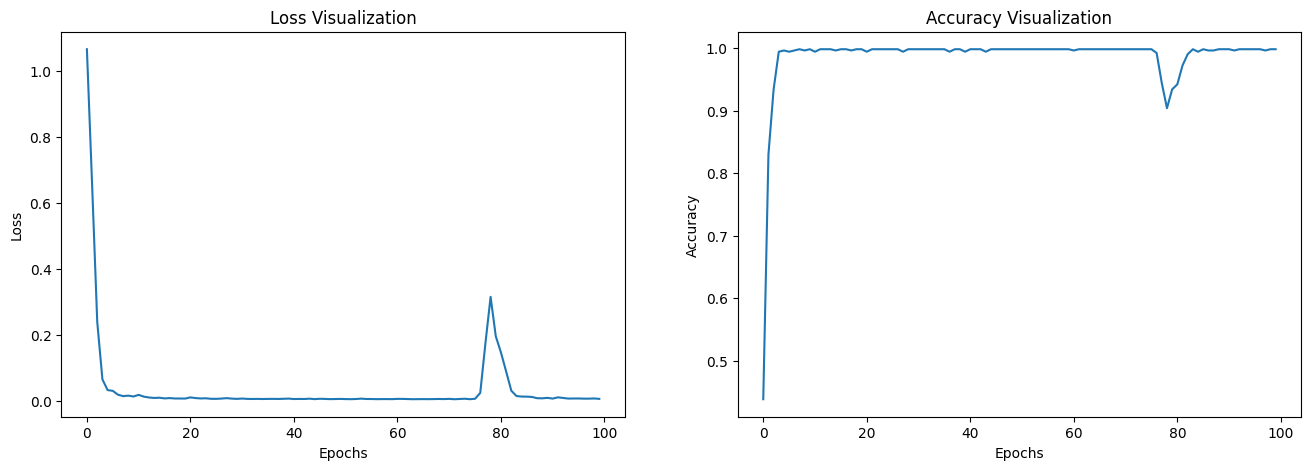

In [30]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(model.history.history["loss"], label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Visualization")
plt.subplot(1,2,2)
plt.plot(model.history.history["accuracy"], label="Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Visualization")
plt.show()

In [34]:
def sentiment_analyzer(sent):
    new_seq = tokenize.texts_to_sequences([sent])
    new_padded_seq = sequence.pad_sequences(new_seq, maxlen=max_length, padding="post")
    pred = model.predict(new_padded_seq)
    predicted_class = np.argmax(pred, axis=1)[0] # Get the index of the highest probability
    sentiment = {0:"Negative", 1:"Neutral", 2:"Positive"}
    return sentiment[predicted_class]

In [35]:
sentiment_analyzer("Absolutely loved this movie! The story was fantastic.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


'Positive'

In [36]:
sentiment_analyzer("It is what it is. Nothing much to say.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


'Neutral'

In [37]:
sentiment_analyzer("This is the worst experience ever. Totally disappointed.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


'Negative'